<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-20 09:31:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  69.0MB/s    in 2.9s    

2025-04-20 09:31:21 (69.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [17]:
import seaborn as sns

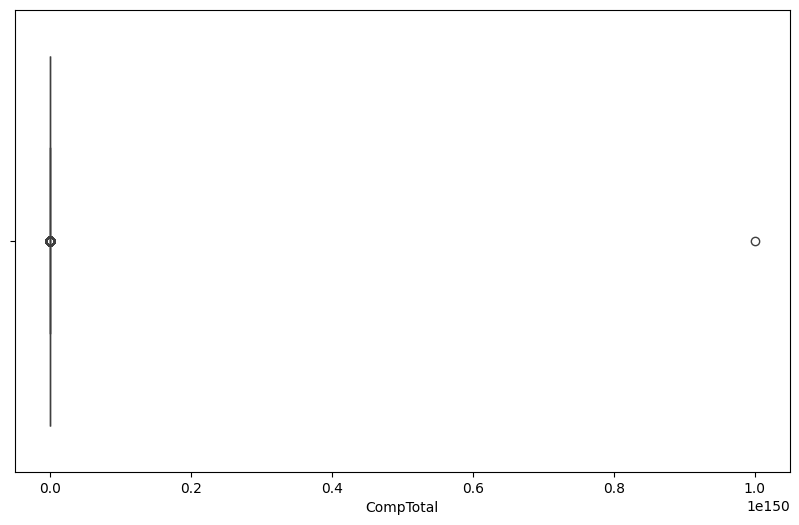

In [19]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df_comp = df[df[['CompTotal']].notnull().all(1)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_comp['CompTotal'])
#plt.boxplot(df_comp['CompTotal']) 
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


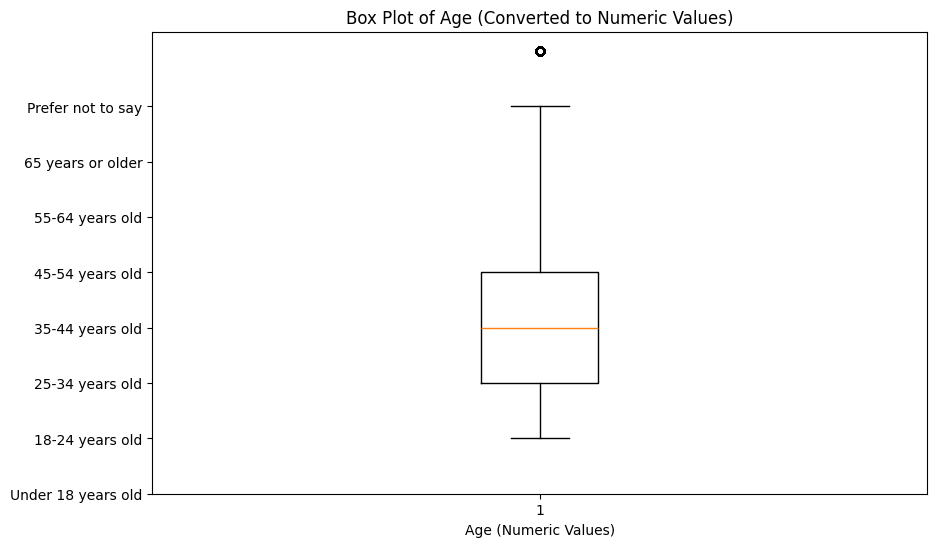

In [26]:
# your code goes here
# Convert the 'Age' column to numeric values
age_mapping = {
    'Under 18 years old': 1, '18-24 years old': 2, '25-34 years old': 3, '35-44 years old': 4,
    '45-54 years old': 5, '55-64 years old': 6, '65 years or older': 7, 'Prefer not to say': 8
}
df['AgeBins'] = df['Age'].map(age_mapping)

# Create the box plot for AgeNum
plt.figure(figsize=(10, 6))

plt.boxplot(df['AgeBins']) 

# Set labels and title
plt.xlabel('Age (Numeric Values)')
plt.yticks(range(8), age_mapping.keys(), rotation=360) 
plt.title('Box Plot of Age (Converted to Numeric Values)')

# Show the plot
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


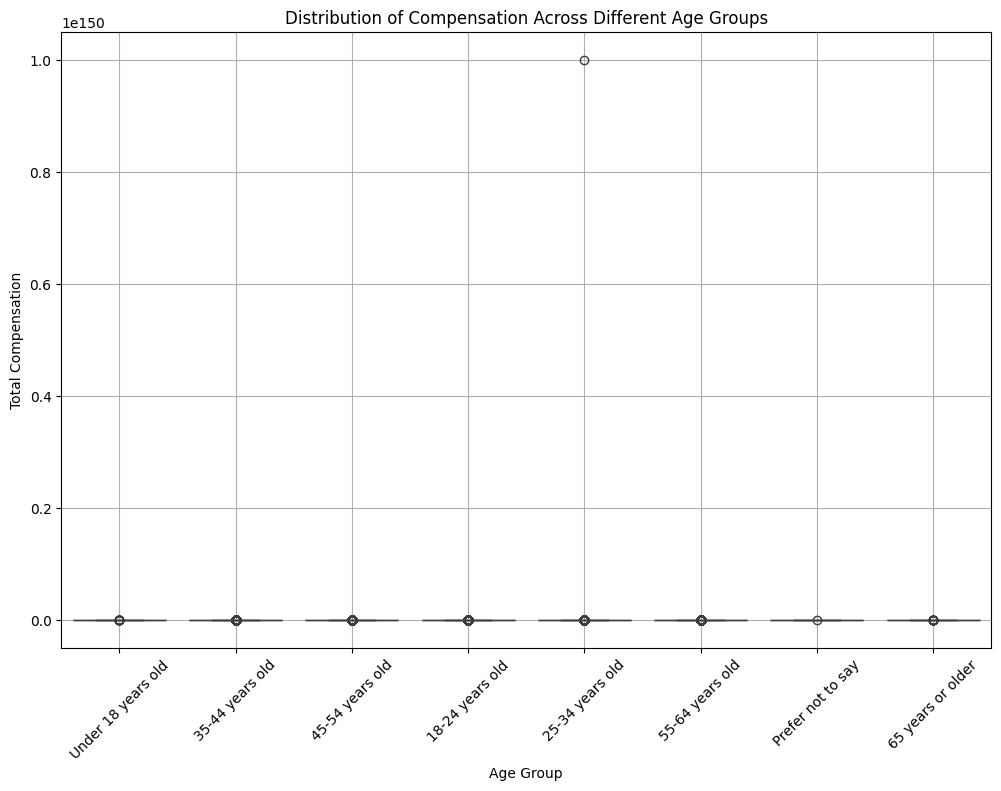

In [28]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Plot the box plot for CompTotal grouped by Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='CompTotal', hue = 'Age', data=df)
plt.title('Distribution of Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


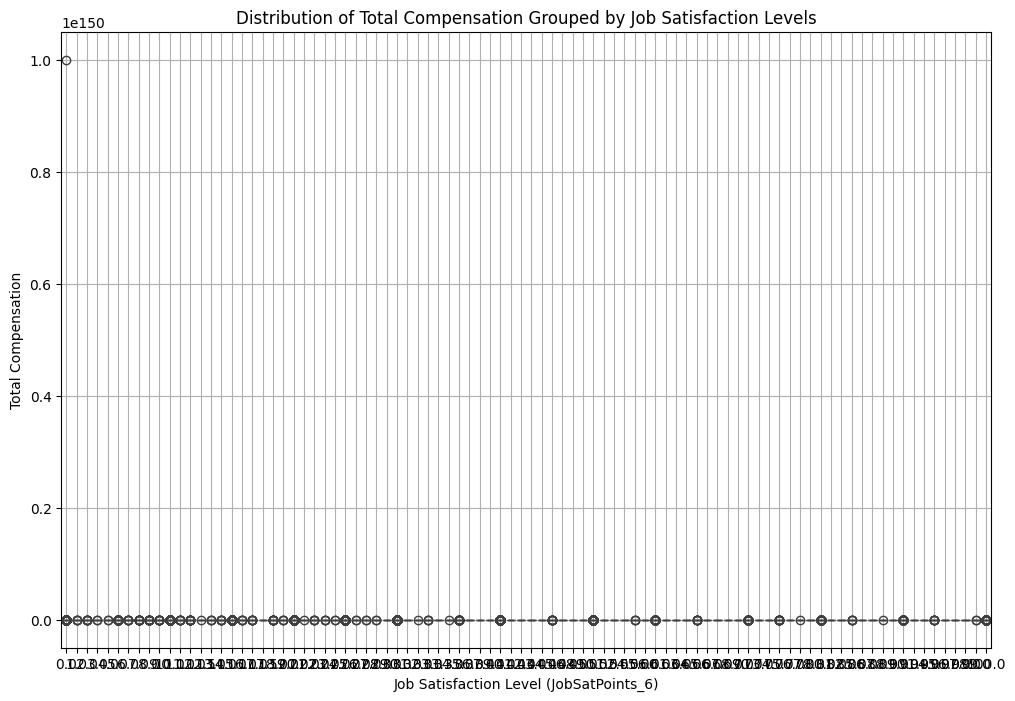

In [33]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
df_final = df[(df['CompTotal'].notna()) & (df['JobSatPoints_6'].notna())] 
# Plot the box plot for CompTotal grouped by JobSatPoints_6
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_final)
plt.title('Distribution of Total Compensation Grouped by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Total Compensation')
plt.grid(True)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


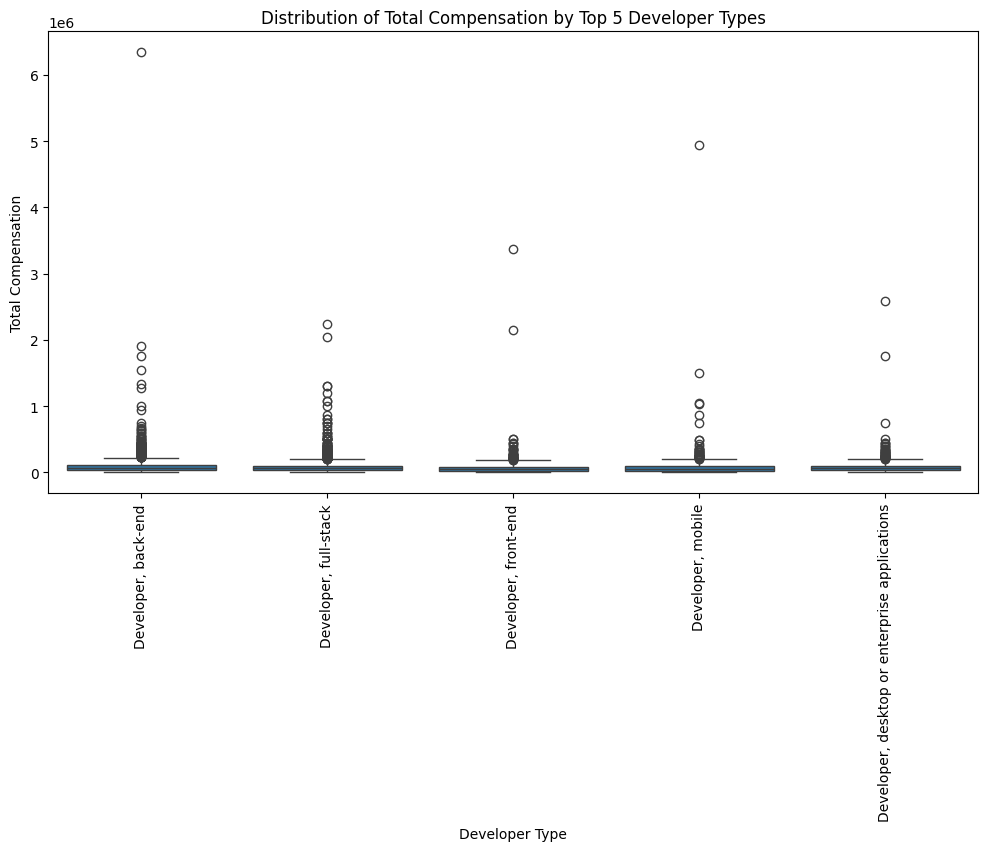

In [60]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter out missing values
df_wo_missingval = df[df['ConvertedCompYearly'].notna() & df['DevType'].notna()]
Devtype_head5 = df_wo_missingval['DevType'].str.split(';', expand=True).stack().value_counts().head(5).index.tolist()
top5dev = df_wo_missingval[df_wo_missingval['DevType'].str.contains('|'.join(Devtype_head5))]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=top5dev)
plt.xlabel('Developer Type')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Top 5 Developer Types')
plt.xticks(rotation=90)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


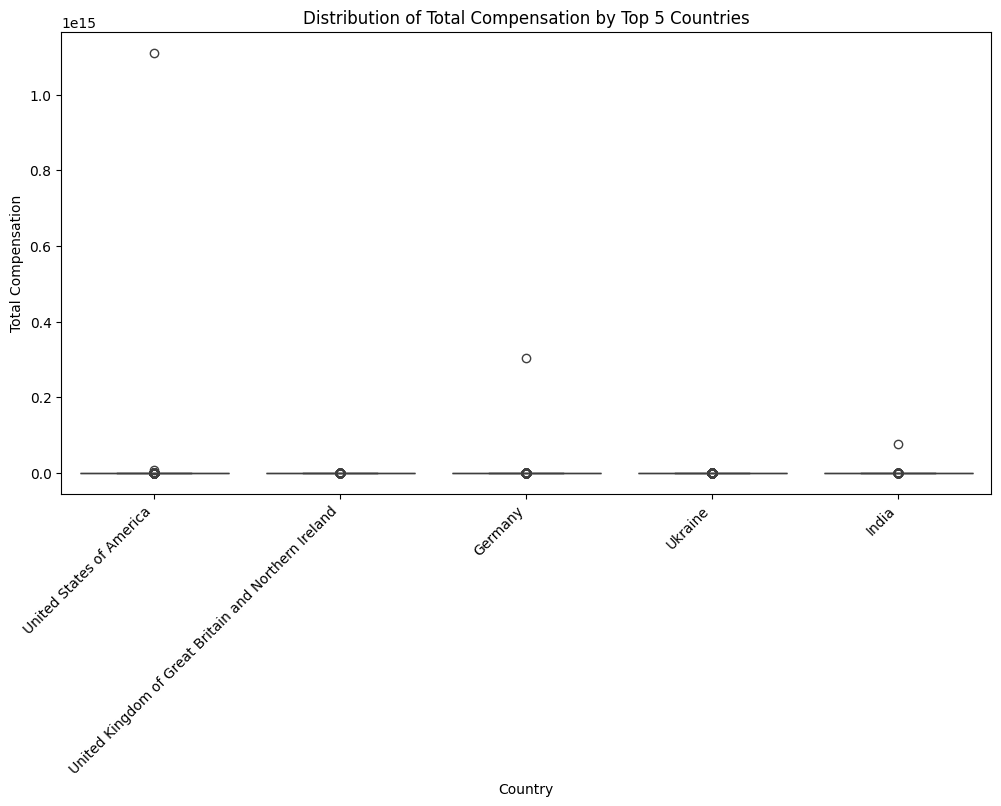

In [63]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
# Filter out missing values
df_wo_missingval = df[df['CompTotal'].notna() & df['Country'].notna()]

# Get the top 5 countries with the most respondents
Country_head5 = df_wo_missingval['Country'].value_counts().head(5).index.tolist()

# Filter DataFrame for top 5 countries
top5Country = df_wo_missingval[df_wo_missingval['Country'].isin(Country_head5)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=top5Country)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Top 5 Countries')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


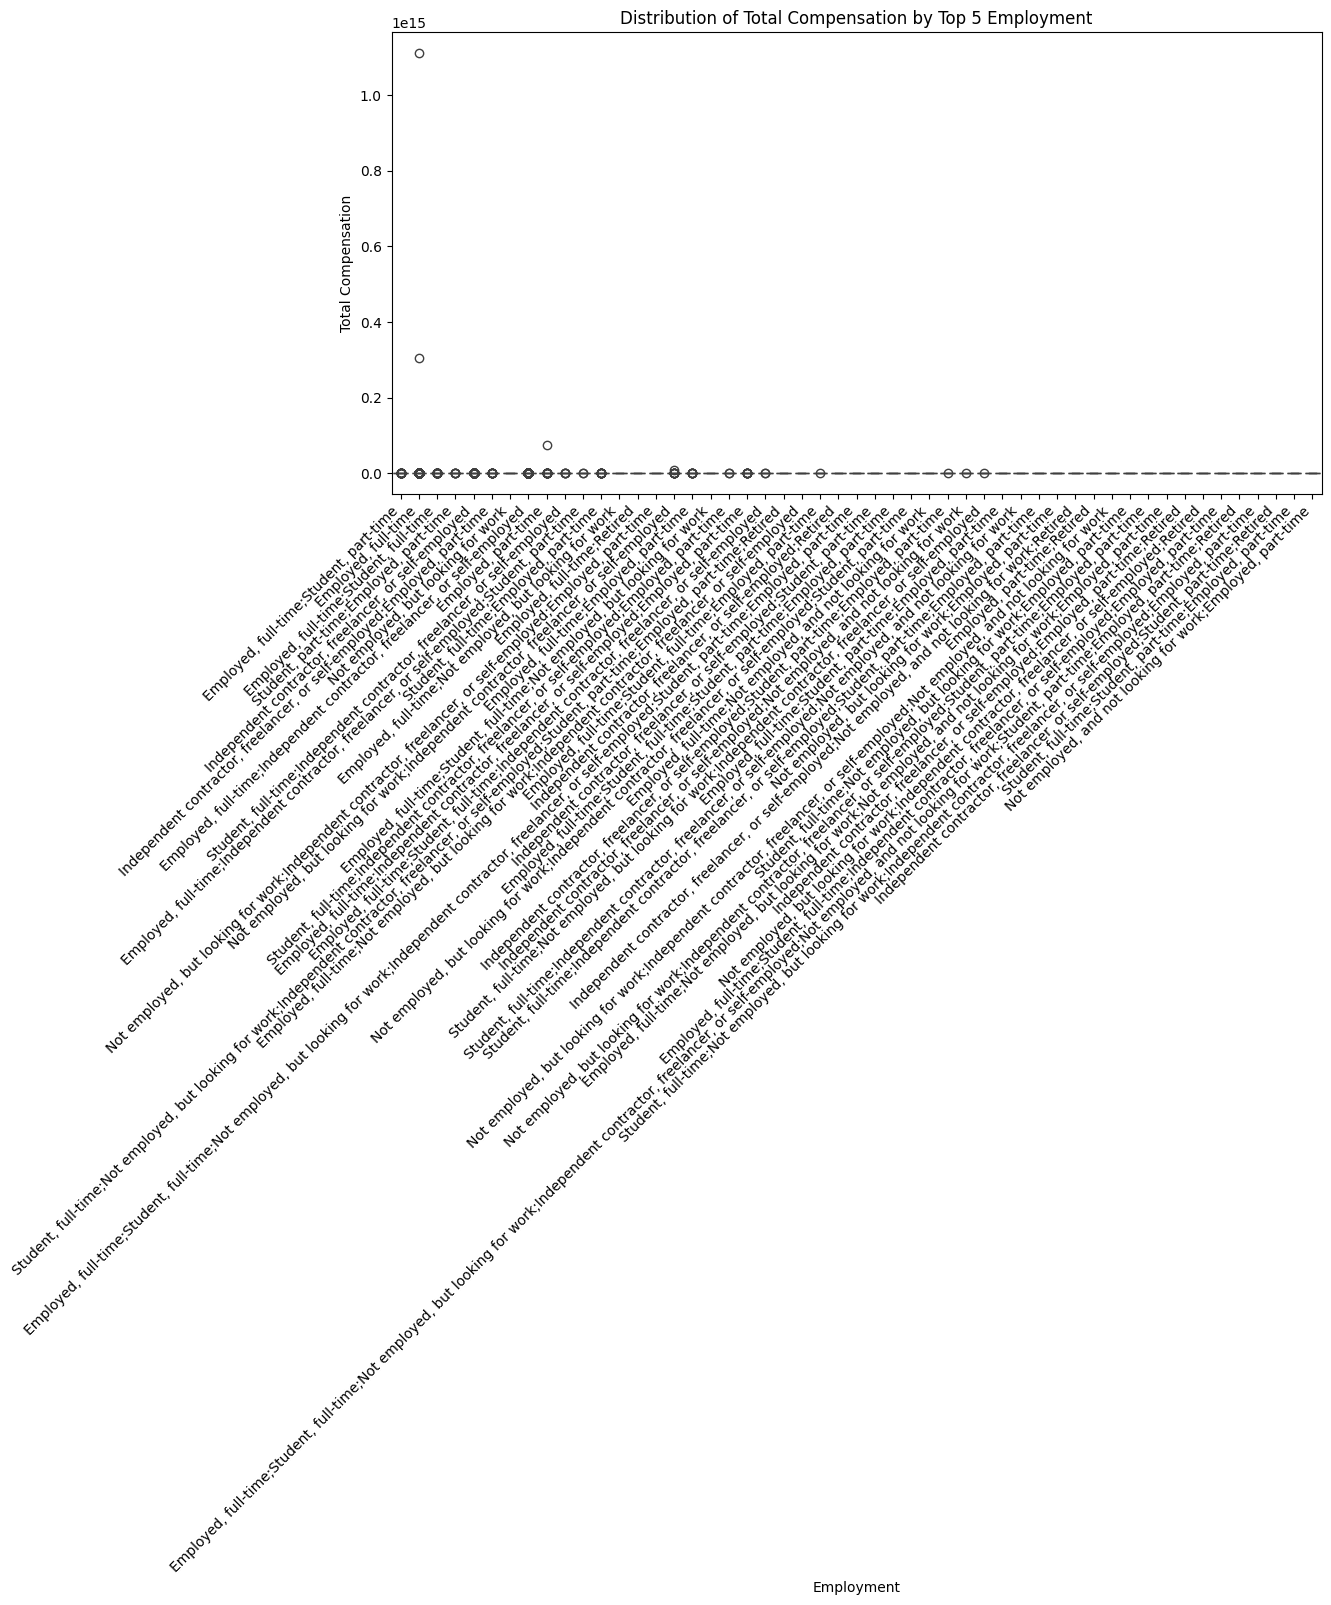

In [65]:
# your code goes here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
# Filter out missing values
df_wo_missingval = df[df['CompTotal'].notna() & df['Employment'].notna()]

# Get the top 5 countries with the most respondents
Employment_head5 = df_wo_missingval['Country'].value_counts().head(5).index.tolist()

# Filter DataFrame for top 5 countries
top5Emp = df_wo_missingval[df_wo_missingval['Country'].isin(Employment_head5)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal', data=top5Emp)

# Set labels and title
plt.xlabel('Employment')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Top 5 Employment')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:

# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
